# 프로젝트 개요

## 프로젝트 목표
- 웹 스크래핑을 이용해서 웹페이지 데이터 추출

## 문제 정의

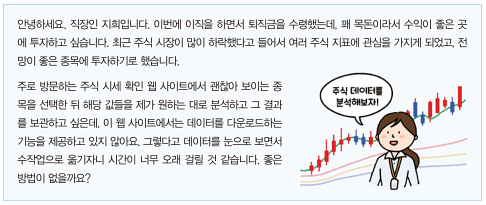


# 웹 스크래핑(Web Scraping)
- 삼성전자 page
- Ctrl + Shift + I
- https://finance.naver.com/item/sise_day.naver?code=005930&page=2


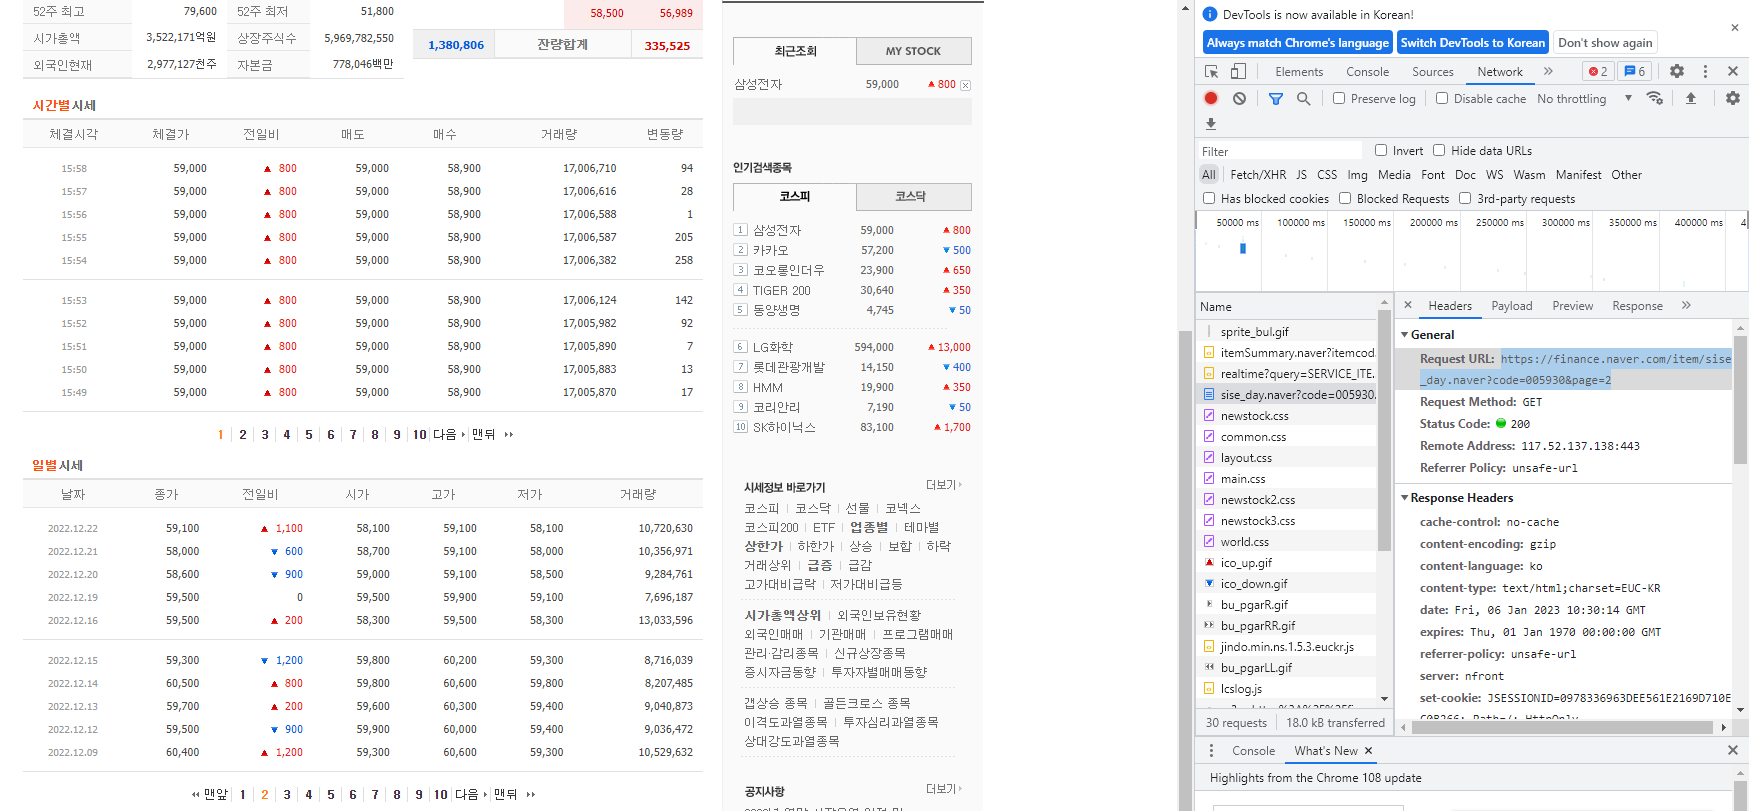

# 데이터 수집 및 가공


## Web Scraping 가능 유무 확인

In [1]:
# 웹 브라우저 없이 웹 정보 확인

# web scraping 가능 유무 확인을 위한 모듈 탑재
import requests

# web scraping 대상 주소 저장
url = 'https://finance.naver.com/item/sise_day.naver?code=005930&page=2'

# HTTP 요청을 대상 주소로 보내고, HTTP 응답 받아서 저장하기
page = requests.get(url)

# 응답 내용 확인하기
print(page.text)


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 :: 세상의 모든 지식, 네이버</title>

<style type="text/css">
.error_content * {margin:0;padding:0;}
.error_content img{border:none;}
.error_content em {font-style:normal;}
.error_content {width:410px; margin:80px auto 0; padding:57px 0 0 0; font-size:12px; font-family:"나눔고딕", "NanumGothic", "돋움", Dotum, AppleGothic, Sans-serif; text-align:left; line-height:14px; background:url(https://ssl.pstatic.net/static/common/error/090610/bg_thumb.gif) no-repeat center top; white-space:nowrap;}
.error_content p{margin:0;}
.error_content .error_desc {margin-bottom:21px; overflow:hidden; text-align:center;}
.error_content .error_desc2 {margin-bottom:11px; padding-bottom:7px; color:#888; line-height:18px; border-bottom:1px solid #eee;}
.error_content .error_desc3 {clear:both; color:#888;}
.error_content .error_desc3

In [2]:
# 헤더 정보 설정
my_headers = {'user-agent':'Mozilla/5.0'}

# 요청 헤더 설정하여 HTTP응답 받아오기
page = requests.get(url, headers=my_headers)

# 응답 내용 확인하기
print(page.text)


<html lang="ko">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 증권</title>

<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20221231142738/css/newstock.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20221231142738/css/common.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20221231142738/css/layout.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20221231142738/css/main.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20221231142738/css/newstock2.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20221231142738/css/newstock3.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20221231142738/css/world.css">
</head>
<body>
<script language="JavaS

## 웹 데이터 수집하기

- Method : read_html()

In [3]:
# Pandas Lib. 탑재
import pandas as pd

# HTML 페이지에서 테이블 추출
pages = pd.read_html(page.text)

# 추출한 데이터 타입 확인
type(pages)

list

## 필요한 테이블 데이터 고르기

In [4]:
# 페이지 개수 확인하기
len(pages)

2

In [5]:
pages[0]

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022.12.22,59100.0,1100.0,58100.0,59100.0,58100.0,10720630.0
2,2022.12.21,58000.0,600.0,58700.0,59100.0,58000.0,10356971.0
3,2022.12.20,58600.0,900.0,59000.0,59100.0,58500.0,9284761.0
4,2022.12.19,59500.0,0.0,59500.0,59900.0,59100.0,7696187.0
5,2022.12.16,59500.0,200.0,58300.0,59500.0,58300.0,13033596.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022.12.15,59300.0,1200.0,59800.0,60200.0,59300.0,8716039.0


In [6]:
pages[1]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,맨앞,1,2,3,4,5,6,7,8,9,10,다음,맨뒤


## 페이징 처리가 되어 있는 데이터 수집하기


### 페이지 번호 증가용 반복문 작성

In [7]:
# 페이지 번호를 제외한 주소 작성
new_url = 'https://finance.naver.com/item/sise_day.naver?code=005930&page='

# 데이터 축척용 데이터프래임 생성
all_tables = pd.DataFrame()


In [8]:
# 페이지 번호 증가용 반복문
for page_number in range(1, 2):
  
  # 페이지 번호 추가한 주소 완성
  full_url = new_url + str(page_number)

  # 주소 확인
  print(f'{page_number} 번째 페이지 읽어오기({full_url})')

  # HTTP 요청 전송 후 응답 받아오기
  page = requests.get(full_url, headers=my_headers)

  # 테이블 추출
  table = pd.read_html(page.text)[0]

  # 수행할 내용 확인
  print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄 추가')

  # 데이터 축적용 데이터 프레임에 테이블 추가
  all_tables = pd.concat([all_tables, table])



1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=1)
전체 0 줄에 15 줄 추가


In [9]:
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.01.06,59000.0,800.0,58300.0,59400.0,57900.0,17006923.0
2,2023.01.05,58200.0,400.0,58200.0,58800.0,57600.0,15682826.0
3,2023.01.04,57800.0,2400.0,55700.0,58000.0,55600.0,20188071.0
4,2023.01.03,55400.0,100.0,55400.0,56000.0,54500.0,13547030.0
5,2023.01.02,55500.0,200.0,55500.0,56100.0,55200.0,10031448.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022.12.29,55300.0,1300.0,56000.0,56200.0,55300.0,11295935.0


In [10]:
# 결손치 제거
all_tables.dropna(inplace=True)

# 데이터 확인 하기
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.01.06,59000.0,800.0,58300.0,59400.0,57900.0,17006923.0
2,2023.01.05,58200.0,400.0,58200.0,58800.0,57600.0,15682826.0
3,2023.01.04,57800.0,2400.0,55700.0,58000.0,55600.0,20188071.0
4,2023.01.03,55400.0,100.0,55400.0,56000.0,54500.0,13547030.0
5,2023.01.02,55500.0,200.0,55500.0,56100.0,55200.0,10031448.0
9,2022.12.29,55300.0,1300.0,56000.0,56200.0,55300.0,11295935.0
10,2022.12.28,56600.0,1500.0,57600.0,57600.0,56400.0,14665410.0
11,2022.12.27,58100.0,200.0,58000.0,58400.0,57900.0,10667027.0
12,2022.12.26,57900.0,200.0,58000.0,58100.0,57700.0,6756411.0
13,2022.12.23,58100.0,1000.0,58200.0,58400.0,57700.0,9829407.0


### 10페이지 데이터 수집

In [11]:
# 페이지 번호 증가용 반복문
for page_number in range(1, 11):
  
  # 페이지 번호 추가한 주소 완성
  full_url = new_url + str(page_number)

  # 주소 확인
  print(f'{page_number} 번째 페이지 읽어오기({full_url})')

  # HTTP 요청 전송 후 응답 받아오기
  page = requests.get(full_url, headers=my_headers)

  # 테이블 추출
  table = pd.read_html(page.text)[0]

  # 수행할 내용 확인
  print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄 추가')

  # 데이터 축적용 데이터 프레임에 테이블 추가
  all_tables = pd.concat([all_tables, table])

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=1)
전체 10 줄에 15 줄 추가
2 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=2)
전체 25 줄에 15 줄 추가
3 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=3)
전체 40 줄에 15 줄 추가
4 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=4)
전체 55 줄에 15 줄 추가
5 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=5)
전체 70 줄에 15 줄 추가
6 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=6)
전체 85 줄에 15 줄 추가
7 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=7)
전체 100 줄에 15 줄 추가
8 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=8)
전체 115 줄에 15 줄 추가
9 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=9)
전체 130 줄에 15 줄 추가
10 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=10)
전체 145 줄에 15 줄 추가


In [12]:
all_tables.dropna(inplace=True)

all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.01.06,59000.0,800.0,58300.0,59400.0,57900.0,17006923.0
2,2023.01.05,58200.0,400.0,58200.0,58800.0,57600.0,15682826.0
3,2023.01.04,57800.0,2400.0,55700.0,58000.0,55600.0,20188071.0
4,2023.01.03,55400.0,100.0,55400.0,56000.0,54500.0,13547030.0
5,2023.01.02,55500.0,200.0,55500.0,56100.0,55200.0,10031448.0
...,...,...,...,...,...,...,...
9,2022.08.19,60900.0,600.0,61400.0,61600.0,60600.0,6923679.0
10,2022.08.18,61500.0,1100.0,60300.0,61900.0,60000.0,16372754.0
11,2022.08.17,60400.0,600.0,61100.0,61200.0,60300.0,9061518.0
12,2022.08.16,61000.0,800.0,60500.0,61600.0,60300.0,15036727.0


# 데이터 시각화

## 상자 수염 그래프
- Box-and-whisker plot
- Method : boxplot()

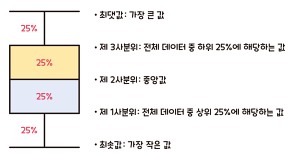

## 열 이름 영문으로 변경

- 날짜 : date
- 종가 : end_price
- 시가 : start_price
- 고가 : highest_price
- 저가 : lowest_price


In [13]:
# 열이름 영문으로 변경
all_tables.rename(columns = {'날짜' : 'date',
                             '종가' : 'end_price',
                             '시가' : 'start_price',
                             '고가' : 'highest_price', 
                             '저가' : 'lowest_price'}, inplace=True)

all_tables

,date,end_price,전일비,start_price,highest_price,lowest_price,거래량
1,2023.01.06,59000.0,800.0,58300.0,59400.0,57900.0,17006923.0
2,2023.01.05,58200.0,400.0,58200.0,58800.0,57600.0,15682826.0
3,2023.01.04,57800.0,2400.0,55700.0,58000.0,55600.0,20188071.0
4,2023.01.03,55400.0,100.0,55400.0,56000.0,54500.0,13547030.0
5,2023.01.02,55500.0,200.0,55500.0,56100.0,55200.0,10031448.0
...,...,...,...,...,...,...,...
9,2022.08.19,60900.0,600.0,61400.0,61600.0,60600.0,6923679.0
10,2022.08.18,61500.0,1100.0,60300.0,61900.0,60000.0,16372754.0
11,2022.08.17,60400.0,600.0,61100.0,61200.0,60300.0,9061518.0
12,2022.08.16,61000.0,800.0,60500.0,61600.0,60300.0,15036727.0


## 필요없는 열 제거

In [14]:
all_tables.drop(['전일비', '거래량'], axis=1, inplace=True)

all_tables

,date,end_price,start_price,highest_price,lowest_price
1,2023.01.06,59000.0,58300.0,59400.0,57900.0
2,2023.01.05,58200.0,58200.0,58800.0,57600.0
3,2023.01.04,57800.0,55700.0,58000.0,55600.0
4,2023.01.03,55400.0,55400.0,56000.0,54500.0
5,2023.01.02,55500.0,55500.0,56100.0,55200.0
...,...,...,...,...,...
9,2022.08.19,60900.0,61400.0,61600.0,60600.0
10,2022.08.18,61500.0,60300.0,61900.0,60000.0
11,2022.08.17,60400.0,61100.0,61200.0,60300.0
12,2022.08.16,61000.0,60500.0,61600.0,60300.0


## 중앙 값 추가

In [15]:
# 중앙값 열 추가
all_tables['midian_price'] = all_tables['highest_price'] - ((all_tables['highest_price'] - all_tables['lowest_price'])/2)

all_tables

,date,end_price,start_price,highest_price,lowest_price,midian_price
1,2023.01.06,59000.0,58300.0,59400.0,57900.0,58650.0
2,2023.01.05,58200.0,58200.0,58800.0,57600.0,58200.0
3,2023.01.04,57800.0,55700.0,58000.0,55600.0,56800.0
4,2023.01.03,55400.0,55400.0,56000.0,54500.0,55250.0
5,2023.01.02,55500.0,55500.0,56100.0,55200.0,55650.0
...,...,...,...,...,...,...
9,2022.08.19,60900.0,61400.0,61600.0,60600.0,61100.0
10,2022.08.18,61500.0,60300.0,61900.0,60000.0,60950.0
11,2022.08.17,60400.0,61100.0,61200.0,60300.0,60750.0
12,2022.08.16,61000.0,60500.0,61600.0,60300.0,60950.0


## 달 정보 추가하기

In [16]:
# 월 정보 열 추가
all_tables['month'] = all_tables['date'].str[0:7]

# 값 확인하기
all_tables

,date,end_price,start_price,highest_price,lowest_price,midian_price,month
1,2023.01.06,59000.0,58300.0,59400.0,57900.0,58650.0,2023.01
2,2023.01.05,58200.0,58200.0,58800.0,57600.0,58200.0,2023.01
3,2023.01.04,57800.0,55700.0,58000.0,55600.0,56800.0,2023.01
4,2023.01.03,55400.0,55400.0,56000.0,54500.0,55250.0,2023.01
5,2023.01.02,55500.0,55500.0,56100.0,55200.0,55650.0,2023.01
...,...,...,...,...,...,...,...
9,2022.08.19,60900.0,61400.0,61600.0,60600.0,61100.0,2022.08
10,2022.08.18,61500.0,60300.0,61900.0,60000.0,60950.0,2022.08
11,2022.08.17,60400.0,61100.0,61200.0,60300.0,60750.0,2022.08
12,2022.08.16,61000.0,60500.0,61600.0,60300.0,60950.0,2022.08


## 색인 변경 및 정렬


In [17]:
# 날짜를 색인으로 지정
all_tables.set_index('date', inplace=True)

# 날짜 오름차순으로 정렬
all_tables.sort_index(inplace=True)

all_tables

,end_price,start_price,highest_price,lowest_price,midian_price,month
date,,,,,,
2022.08.12,60200.0,59500.0,60700.0,59400.0,60050.0,2022.08
2022.08.16,61000.0,60500.0,61600.0,60300.0,60950.0,2022.08
2022.08.17,60400.0,61100.0,61200.0,60300.0,60750.0,2022.08
2022.08.18,61500.0,60300.0,61900.0,60000.0,60950.0,2022.08
2022.08.19,60900.0,61400.0,61600.0,60600.0,61100.0,2022.08
...,...,...,...,...,...,...
2023.01.04,57800.0,55700.0,58000.0,55600.0,56800.0,2023.01
2023.01.05,58200.0,58200.0,58800.0,57600.0,58200.0,2023.01
2023.01.05,58200.0,58200.0,58800.0,57600.0,58200.0,2023.01


# 그래프 그리기

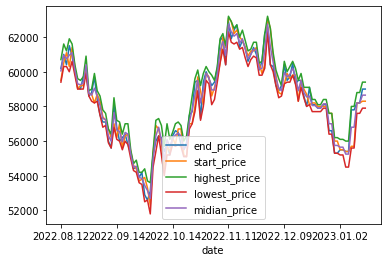

In [18]:
all_tables.plot.line()

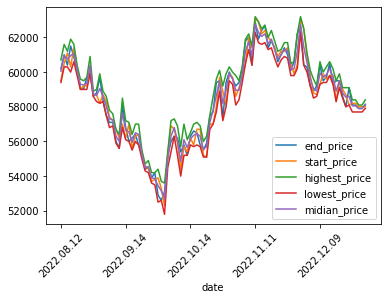

In [19]:
# 앞 15일 만 표시
all_tables[:-15].plot.line(rot=45)

# 상자 수염 그리기

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


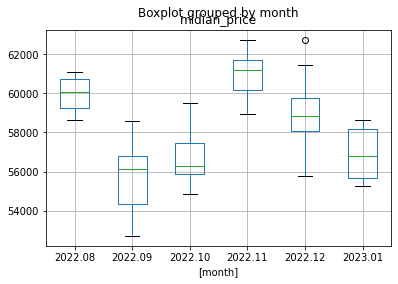

In [20]:
all_tables.boxplot(column=['midian_price'], by=['month'])